# Úloha 1
##### Pravděpodobnost určité události odhadujeme jako 0,4. Sázková kancelář nabízí na danou událost kurs 2,5 (pokud událost nastane, vyplatí mi 2,5násobek vsazené částky), přitom požaduje ještě nevratný poplatek ve výši 10 % ze vsazené částky.
#####           a) Je pro mě za daných podmínek výhodné vsadit (můj střední celkový výnos bude kladný)? Pokud ano, v jakém rozmezí musí být vsazená částka, aby bylo výhodné vsadit?
#####           b) Při jaké výši kursu je střední celkový výnos rovný nule bez ohledu na výši vsazené částky?

## Import packages

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random

### a) Je pro mě za daných podmínek výhodné vsadit (můj střední celkový výnos bude kladný)? Pokud ano, v jakém rozmezí musí být vsazená částka, aby bylo výhodné vsadit?

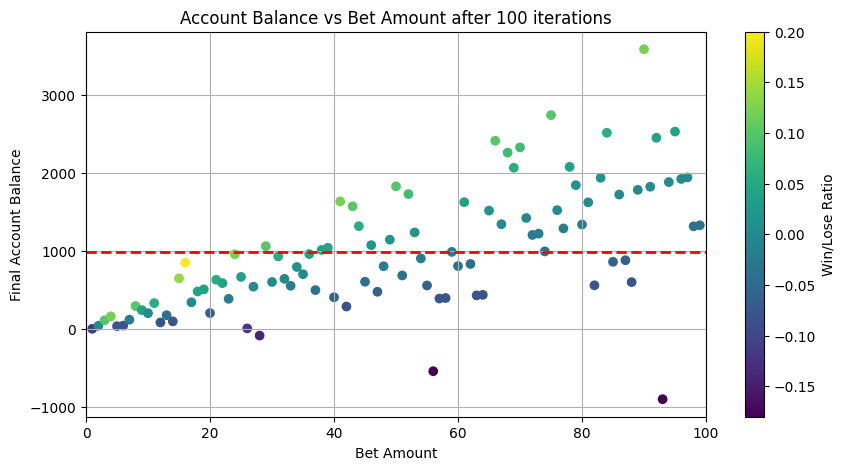

In [3]:
def play(score, number_of_iterations, bet, odd, probability):  
    # Funkce simuluje řetězené sázky (number_of_iteratiosn) a vyhodnocuje vývoj sázkového budgetu a přehledu výher a proher 
    counter = 0
    while counter < number_of_iterations:
        if random.random() <= probability:                                   
            score["win"] += 1
            score["account"] += bet * odd - bet * 0.1
        else:
            score["loose"] += 1
            score["account"] -= bet - bet * 0.1
        counter += 1
    return score                                                        

def plot_multiple_bets(number_of_iterations, odd, probability):
    # Metoda plotuje jednotlivé účtové bilance po definovaném počtu iterací a testuje jednotlivé sázky v rozsahu 1-100
    # Konstantní je kurz a pravděpodobnost výhry
    fig, ax= plt.subplots(figsize=(10,5))
    bet_amounts = []
    account_balances = []
    win_loose_ratios = []

    for bet in range(1, 100, 1):
        score = {"win": 0, "loose": 0, "account": -bet}
        
        score = play(score, number_of_iterations, bet, odd, probability)
        win_loose_ratio = (score["win"] / number_of_iterations) - probability
        
        bet_amounts.append(bet)
        account_balances.append(score["account"])
        win_loose_ratios.append(win_loose_ratio)
    
    # Vyobrazení výsledků + grafické znázornění Win/Lose Ratio pro lepší přehled o statistice jendotlivých bodů 
    scatter = ax.scatter( x=bet_amounts, 
                            y=account_balances,
                            c=win_loose_ratios,  # This now uses a list of ratios
                            cmap='viridis')
    
    ax.set_xlabel('Bet Amount')
    ax.set_ylabel('Final Account Balance')
    ax.set_title('Account Balance vs Bet Amount after 100 iterations')
    ax.grid(True)
    ax.axhline(np.mean(account_balances), color='red', lw=2, linestyle='--')
    ax.set_xlim(0, 100)
    
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Win/Lose Ratio')

    plt.show()
    

def main():
    probability = 0.4
    odd = 2.5
    number_of_iterations = 50

    
    plot_multiple_bets(number_of_iterations, odd, probability)
    

if __name__ == "__main__":
    main()

### b) Při jaké výši kursu je střední celkový výnos rovný nule bez ohledu na výši vsazené částky?

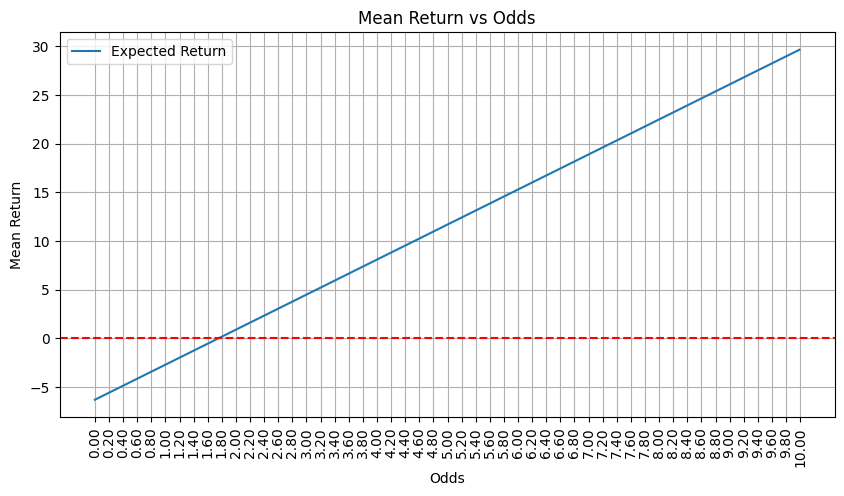

In [30]:
def play(score, number_of_iterations, bet, odd, probability):  
    counter = 0
    while counter < number_of_iterations:
        if random.random() <= probability:                                   
            score["win"] += 1
            score["account"] += bet * odd - bet * 0.1
        else:
            score["loose"] += 1
            score["account"] -= bet - bet * 0.1
        counter += 1
    return score                                                        

def plot_multiple_bets(number_of_iterations, odd, probability):
    fig, ax= plt.subplots(figsize=(10,5))
    bet_amounts = []
    account_balances = []
    win_loose_ratios = []

    for bet in range(1, 100, 1):
        score = {"win": 0, "loose": 0, "account": -bet}
        
        score = play(score, number_of_iterations, bet, odd, probability)
        win_loose_ratio = (score["win"] / number_of_iterations) - probability
        
        bet_amounts.append(bet)
        account_balances.append(score["account"])
        win_loose_ratios.append(win_loose_ratio)
    
    scatter = ax.scatter( x=bet_amounts, 
                            y=account_balances,
                            c=win_loose_ratios,  # This now uses a list of ratios
                            cmap='viridis')
    
    ax.set_xlabel('Bet Amount')
    ax.set_ylabel('Final Account Balance')
    ax.set_title('Account Balance vs Bet Amount after 100 iterations')
    ax.grid(True)
    ax.axhline(np.mean(account_balances), color='red', lw=2, linestyle='--')
    ax.set_xlim(0, 100)
    
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Win/Lose Ratio')

    plt.show()

def plot_multiple_odds(number_of_iterations, bet, probability):
    #   průměrný návrat/ očeákvaný návrat VZOREC: amount won * probability - amount lost * probability

    odds = []
    x_values = []
    for odd in np.arange(0, 10, 0.01):
        x= (bet*odd - bet*0.1) * probability - (bet + bet*0.1) * (1-probability)
        odds.append(odd)
        x_values.append(x)

    # vykreslení grafu a nalezení optimálního kurzu pro 0 střednědobý 

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(odds, x_values, label='Expected Return')
    
    ax.set_title('Mean Return vs Odds')
    ax.set_xlabel('Odds')
    ax.set_ylabel('Mean Return')
    
    ax.axhline(0, color='red', linestyle='--')
    ax.set_xticks(np.arange(0, 10.2, 0.2))
    ax.set_xticklabels([f'{x:.2f}' for x in np.arange(0, 10.2, 0.2)], rotation='vertical')
    ax.legend()
    ax.grid(True)
    
    plt.show()

def main():
    probability = 0.4
    odd = 1.5
    number_of_iterations = 100

    random_bet = random.randint(1, 100)


    plot_multiple_odds(number_of_iterations, random_bet, probability)
    #plot_multiple_bets(number_of_iterations, odd, probability)
    

if __name__ == "__main__":
    main()